# Movie Rating Prediction System with User Segmentation
## A Complete ML Pipeline Using Clustering, Decision Trees, and Recommendation Systems

**Project Overview:**
- Dataset: MovieLens (100K ratings)
- Goal: PREDICT movie ratings (continuous values 0.5-5.0)
- Methods: K-Means Clustering, Decision Tree Regression, Matrix Factorization
- Focus: PREDICTION with calculations (not classification)

---

## 1. Setup and Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.cluster import KMeans, DBSCAN
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

# Set random seed for reproducibility
np.random.seed(42)

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('movie_prediction_project.log'),
        logging.StreamHandler()
    ]
)

logger = logging.getLogger(__name__)
logger.info('='*80)
logger.info('MOVIE RATING PREDICTION PROJECT STARTED')
logger.info(f'Start Time: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}')
logger.info('='*80)

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print('✓ All libraries imported successfully!')
logger.info('All libraries imported successfully')

2025-11-06 19:52:03,704 - INFO - ================================================================================
2025-11-06 19:52:03,705 - INFO - MOVIE RATING PREDICTION PROJECT STARTED
2025-11-06 19:52:03,706 - INFO - Start Time: 2025-11-06 19:52:03
2025-11-06 19:52:03,706 - INFO - ================================================================================
2025-11-06 19:52:03,709 - INFO - All libraries imported successfully


✓ All libraries imported successfully!


## 2. Data Loading and Exploration

In [2]:
logger.info('\n' + '='*80)
logger.info('PHASE 1: DATA LOADING AND EXPLORATION')
logger.info('='*80)

# Load datasets
try:
    ratings = pd.read_csv('ml-latest-small/ratings.csv')
    movies = pd.read_csv('ml-latest-small/movies.csv')
    logger.info(f'✓ Ratings dataset loaded: {ratings.shape[0]} rows, {ratings.shape[1]} columns')
    logger.info(f'✓ Movies dataset loaded: {movies.shape[0]} rows, {movies.shape[1]} columns')
    print(f'✓ Loaded {ratings.shape[0]:,} ratings for {movies.shape[0]:,} movies')
except Exception as e:
    logger.error(f'Error loading data: {str(e)}')
    raise

# Display first few rows
print('\n--- Ratings Data Sample ---')
print(ratings.head())
logger.info(f'Ratings columns: {list(ratings.columns)}')

print('\n--- Movies Data Sample ---')
print(movies.head())
logger.info(f'Movies columns: {list(movies.columns)}')

# Basic statistics
print('\n--- Dataset Statistics ---')
n_users = ratings['userId'].nunique()
n_movies = ratings['movieId'].nunique()
n_ratings = len(ratings)
sparsity = (1 - n_ratings / (n_users * n_movies)) * 100

print(f'Total Users: {n_users:,}')
print(f'Total Movies: {n_movies:,}')
print(f'Total Ratings: {n_ratings:,}')
print(f'Sparsity: {sparsity:.2f}%')
print(f'Rating Range: {ratings["rating"].min()} - {ratings["rating"].max()}')
print(f'Average Rating: {ratings["rating"].mean():.2f}')

logger.info(f'Total Users: {n_users}')
logger.info(f'Total Movies: {n_movies}')
logger.info(f'Total Ratings: {n_ratings}')
logger.info(f'Sparsity: {sparsity:.2f}%')
logger.info(f'Average Rating: {ratings["rating"].mean():.2f}')

2025-11-06 19:52:07,415 - INFO - 
2025-11-06 19:52:07,416 - INFO - PHASE 1: DATA LOADING AND EXPLORATION
2025-11-06 19:52:07,417 - INFO - ================================================================================
--- Logging error ---
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\logging\__init__.py", line 1163, in emit
    stream.write(msg + self.terminator)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeEncodeError: 'charmap' codec can't encode character '\u2713' in position 33: character maps to <undefined>
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users

✓ Loaded 100,836 ratings for 9,742 movies

--- Ratings Data Sample ---
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

--- Movies Data Sample ---
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

--- Dataset Statistics ---
Total Users: 610
Total Movies: 9,724
Total Ratings

## 3. Data Visualization

2025-11-06 19:52:13,806 - INFO - 
Creating initial data visualizations...
--- Logging error ---
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\logging\__init__.py", line 1163, in emit
    stream.write(msg + self.terminator)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeEncodeError: 'charmap' codec can't encode character '\u2713' in position 33: character maps to <undefined>
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\cakypro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ipykernel_la

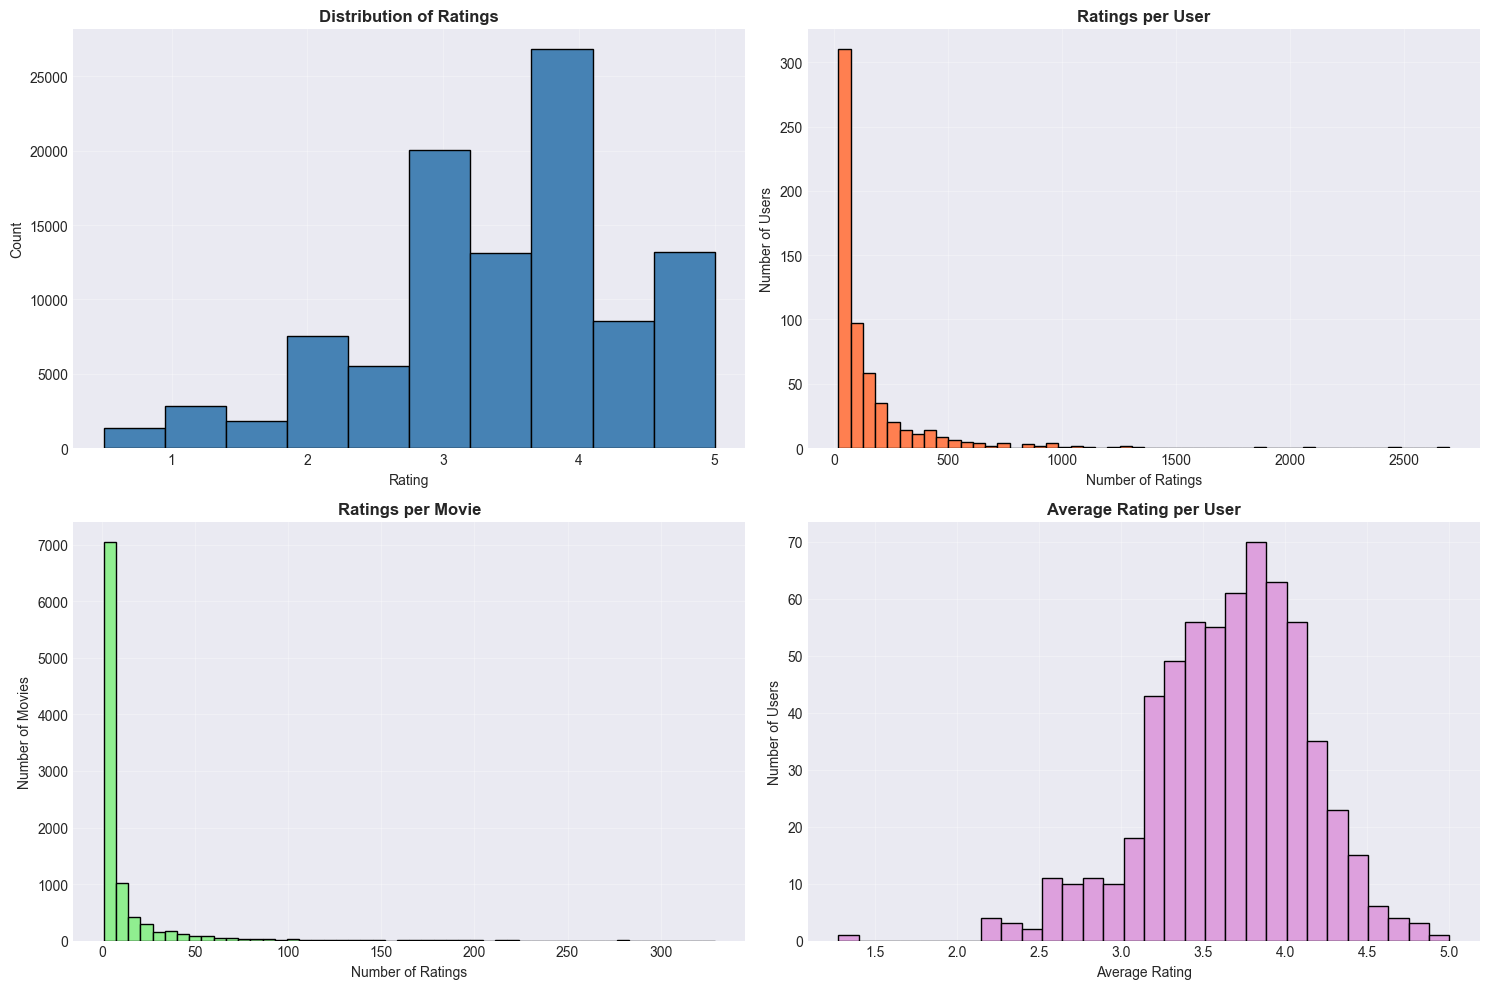

--- Logging error ---
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\logging\__init__.py", line 1163, in emit
    stream.write(msg + self.terminator)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeEncodeError: 'charmap' codec can't encode character '\u2713' in position 33: character maps to <undefined>
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\cakypro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\


✓ Data exploration complete!


In [3]:
logger.info('\nCreating initial data visualizations...')

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Rating distribution
axes[0, 0].hist(ratings['rating'], bins=10, edgecolor='black', color='steelblue')
axes[0, 0].set_title('Distribution of Ratings', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Count')
axes[0, 0].grid(True, alpha=0.3)
logger.info('✓ Rating distribution plot created')

# Ratings per user
ratings_per_user = ratings.groupby('userId').size()
axes[0, 1].hist(ratings_per_user, bins=50, edgecolor='black', color='coral')
axes[0, 1].set_title('Ratings per User', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Number of Ratings')
axes[0, 1].set_ylabel('Number of Users')
axes[0, 1].grid(True, alpha=0.3)
logger.info(f'✓ Ratings per user: min={ratings_per_user.min()}, max={ratings_per_user.max()}, mean={ratings_per_user.mean():.2f}')

# Ratings per movie
ratings_per_movie = ratings.groupby('movieId').size()
axes[1, 0].hist(ratings_per_movie, bins=50, edgecolor='black', color='lightgreen')
axes[1, 0].set_title('Ratings per Movie', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Number of Ratings')
axes[1, 0].set_ylabel('Number of Movies')
axes[1, 0].grid(True, alpha=0.3)
logger.info(f'✓ Ratings per movie: min={ratings_per_movie.min()}, max={ratings_per_movie.max()}, mean={ratings_per_movie.mean():.2f}')

# Average rating by user
avg_rating_per_user = ratings.groupby('userId')['rating'].mean()
axes[1, 1].hist(avg_rating_per_user, bins=30, edgecolor='black', color='plum')
axes[1, 1].set_title('Average Rating per User', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Average Rating')
axes[1, 1].set_ylabel('Number of Users')
axes[1, 1].grid(True, alpha=0.3)
logger.info(f'✓ Average rating per user: min={avg_rating_per_user.min():.2f}, max={avg_rating_per_user.max():.2f}, mean={avg_rating_per_user.mean():.2f}')

plt.tight_layout()
plt.savefig('01_data_exploration.png', dpi=300, bbox_inches='tight')
plt.show()
logger.info('✓ Data exploration plots saved as 01_data_exploration.png')

print('\n✓ Data exploration complete!')

## 4. Feature Engineering for User Segmentation

In [4]:
logger.info('\n' + '='*80)
logger.info('PHASE 2: FEATURE ENGINEERING FOR USER SEGMENTATION')
logger.info('='*80)

# Create user features for clustering
logger.info('Creating user features...')

user_features = ratings.groupby('userId').agg({
    'rating': ['count', 'mean', 'std', 'min', 'max'],
    'movieId': 'nunique'
}).reset_index()

user_features.columns = ['userId', 'num_ratings', 'avg_rating', 'std_rating', 'min_rating', 'max_rating', 'num_movies']
user_features['std_rating'].fillna(0, inplace=True)

# Calculate rating variance (spread)
user_features['rating_range'] = user_features['max_rating'] - user_features['min_rating']

logger.info(f'✓ User features created: {user_features.shape}')
logger.info(f'Features: {list(user_features.columns)}')

print('\n--- User Features Sample ---')
print(user_features.head())
print('\n--- User Features Statistics ---')
print(user_features.describe())

logger.info('\nUser feature statistics:')
for col in ['num_ratings', 'avg_rating', 'std_rating']:
    logger.info(f'{col}: mean={user_features[col].mean():.2f}, std={user_features[col].std():.2f}')

2025-11-06 19:52:20,646 - INFO - 
2025-11-06 19:52:20,647 - INFO - PHASE 2: FEATURE ENGINEERING FOR USER SEGMENTATION
2025-11-06 19:52:20,648 - INFO - ================================================================================
2025-11-06 19:52:20,648 - INFO - Creating user features...
--- Logging error ---
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\logging\__init__.py", line 1163, in emit
    stream.write(msg + self.terminator)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeEncodeError: 'charmap' codec can't encode character '\u2713' in position 33: character maps to <undefined>
Call stack:
  File "<frozen runpy>", line 198, in _run_module


--- User Features Sample ---
   userId  num_ratings  avg_rating  std_rating  min_rating  max_rating  \
0       1          232    4.366379    0.800048         1.0         5.0   
1       2           29    3.948276    0.805615         2.0         5.0   
2       3           39    2.435897    2.090642         0.5         5.0   
3       4          216    3.555556    1.314204         1.0         5.0   
4       5           44    3.636364    0.990441         1.0         5.0   

   num_movies  rating_range  
0         232           4.0  
1          29           3.0  
2          39           4.5  
3         216           4.0  
4          44           4.0  

--- User Features Statistics ---
           userId  num_ratings  avg_rating  std_rating  min_rating  \
count  610.000000   610.000000  610.000000  610.000000  610.000000   
mean   305.500000   165.304918    3.657222    0.927116    1.314754   
std    176.236111   269.480584    0.480635    0.266108    0.835449   
min      1.000000    20.000000 

## 5. User Segmentation with K-Means Clustering

2025-11-06 19:52:29,847 - INFO - 
2025-11-06 19:52:29,848 - INFO - PHASE 3: USER SEGMENTATION WITH K-MEANS CLUSTERING
2025-11-06 19:52:29,849 - INFO - ================================================================================
2025-11-06 19:52:29,850 - INFO - Clustering features: ['num_ratings', 'avg_rating', 'std_rating']
2025-11-06 19:52:29,851 - INFO - Feature matrix shape: (610, 3)
--- Logging error ---
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\logging\__init__.py", line 1163, in emit
    stream.write(msg + self.terminator)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeEncodeError: 'charmap' codec can't encode character '\u2713' in p

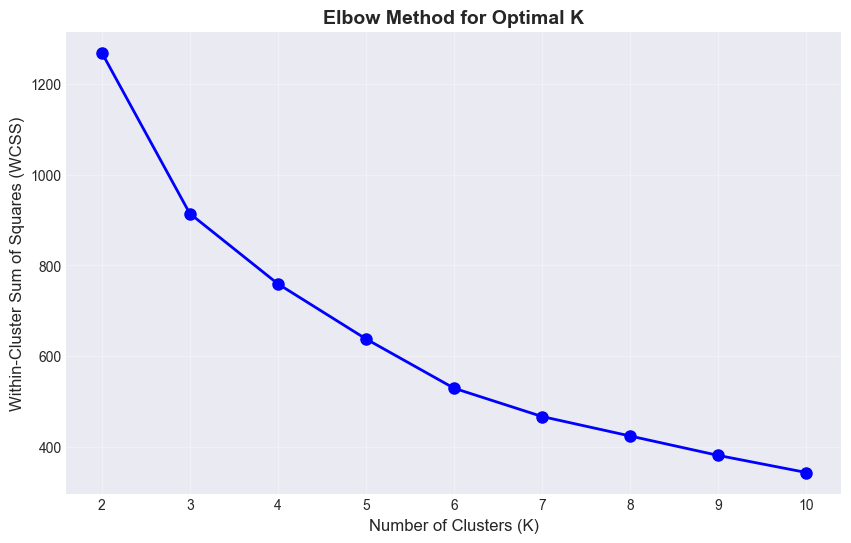

--- Logging error ---
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\logging\__init__.py", line 1163, in emit
    stream.write(msg + self.terminator)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeEncodeError: 'charmap' codec can't encode character '\u2713' in position 33: character maps to <undefined>
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\cakypro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\


--- Cluster Distribution ---
cluster
0    270
1     97
2     32
3    211
Name: count, dtype: int64

--- Cluster Characteristics ---
         num_ratings  avg_rating  std_rating
cluster                                     
0         135.092593    3.599222    0.969563
1          92.092784    3.070337    1.315038
2        1061.937500    3.256312    0.914339
3         101.639810    4.062043    0.696403

✓ User segmentation complete!


In [5]:
logger.info('\n' + '='*80)
logger.info('PHASE 3: USER SEGMENTATION WITH K-MEANS CLUSTERING')
logger.info('='*80)

# Select features for clustering
clustering_features = ['num_ratings', 'avg_rating', 'std_rating']
X_cluster = user_features[clustering_features].copy()

logger.info(f'Clustering features: {clustering_features}')
logger.info(f'Feature matrix shape: {X_cluster.shape}')

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)
logger.info('✓ Features standardized (mean=0, std=1)')
logger.info(f'Scaled data - mean: {X_scaled.mean(axis=0)}, std: {X_scaled.std(axis=0)}')

# Elbow method to find optimal K
logger.info('\nPerforming Elbow Method to find optimal K...')
wcss = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    logger.info(f'K={k}: WCSS={kmeans.inertia_:.2f}')

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.savefig('02_elbow_method.png', dpi=300, bbox_inches='tight')
plt.show()
logger.info('✓ Elbow curve saved as 02_elbow_method.png')

# Apply K-Means with optimal K
optimal_k = 4
logger.info(f'\nApplying K-Means with optimal K={optimal_k}')

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
user_features['cluster'] = kmeans_final.fit_predict(X_scaled)

logger.info(f'✓ K-Means clustering complete')
logger.info(f'Inertia (WCSS): {kmeans_final.inertia_:.2f}')
logger.info(f'Number of iterations: {kmeans_final.n_iter_}')

# Cluster distribution
cluster_counts = user_features['cluster'].value_counts().sort_index()
print('\n--- Cluster Distribution ---')
print(cluster_counts)
logger.info('\nCluster distribution:')
for cluster, count in cluster_counts.items():
    logger.info(f'Cluster {cluster}: {count} users ({count/len(user_features)*100:.1f}%)')

# Cluster characteristics
print('\n--- Cluster Characteristics ---')
cluster_summary = user_features.groupby('cluster')[clustering_features].mean()
print(cluster_summary)

logger.info('\nCluster characteristics (mean values):')
for idx, row in cluster_summary.iterrows():
    logger.info(f'Cluster {idx}: num_ratings={row["num_ratings"]:.1f}, avg_rating={row["avg_rating"]:.2f}, std_rating={row["std_rating"]:.2f}')

print('\n✓ User segmentation complete!')

## 6. Visualize Clusters

2025-11-06 19:52:39,160 - INFO - 
Creating cluster visualizations...


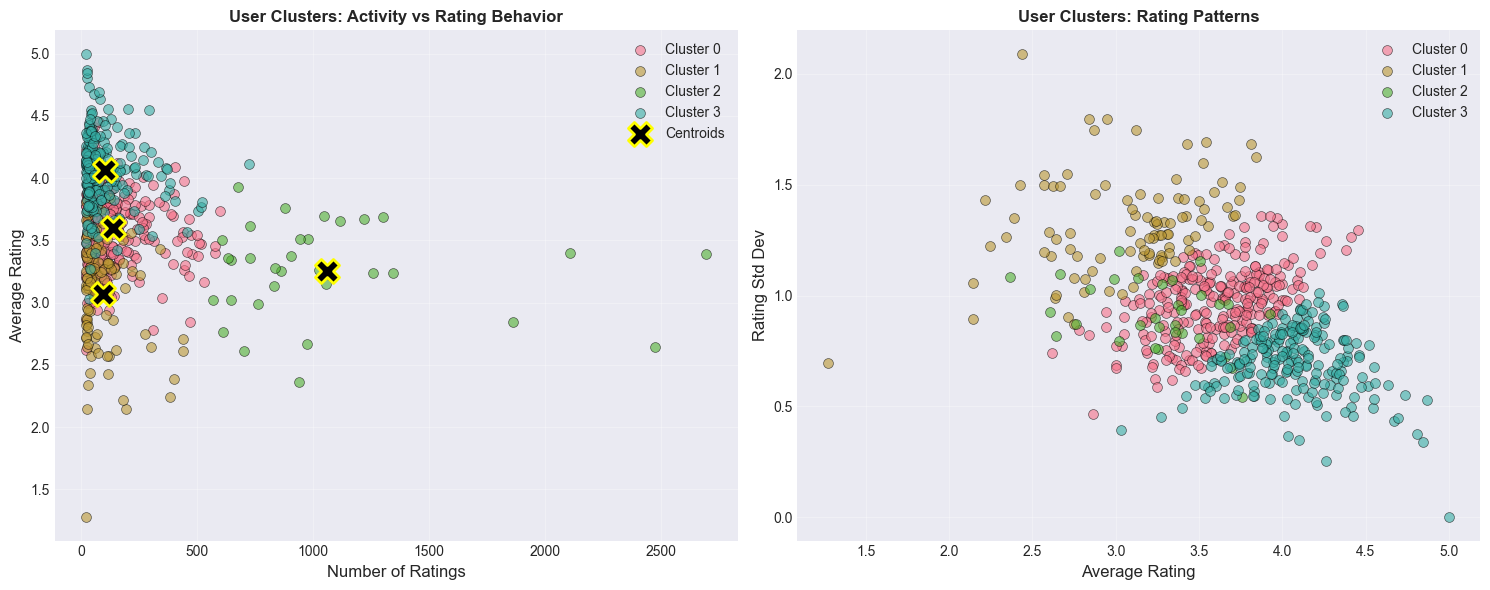

--- Logging error ---
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\logging\__init__.py", line 1163, in emit
    stream.write(msg + self.terminator)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeEncodeError: 'charmap' codec can't encode character '\u2713' in position 33: character maps to <undefined>
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\cakypro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\


--- Cluster Interpretation ---
Cluster 0: High Activity, Positive, Varied Tastes
  - Avg ratings given: 135.1
  - Avg rating value: 3.60
  - Avg std dev: 0.97

Cluster 1: High Activity, Moderate, Varied Tastes
  - Avg ratings given: 92.1
  - Avg rating value: 3.07
  - Avg std dev: 1.32

Cluster 2: High Activity, Moderate, Varied Tastes
  - Avg ratings given: 1061.9
  - Avg rating value: 3.26
  - Avg std dev: 0.91

Cluster 3: High Activity, Positive, Consistent
  - Avg ratings given: 101.6
  - Avg rating value: 4.06
  - Avg std dev: 0.70



In [6]:
logger.info('\nCreating cluster visualizations...')

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot: Number of ratings vs Average rating
for cluster in range(optimal_k):
    cluster_data = user_features[user_features['cluster'] == cluster]
    axes[0].scatter(cluster_data['num_ratings'], cluster_data['avg_rating'], 
                   label=f'Cluster {cluster}', alpha=0.6, s=50, edgecolors='k', linewidth=0.5)

# Plot centroids
centroids_original = scaler.inverse_transform(kmeans_final.cluster_centers_)
axes[0].scatter(centroids_original[:, 0], centroids_original[:, 1], 
               c='black', marker='X', s=300, edgecolors='yellow', linewidth=2, label='Centroids')
axes[0].set_xlabel('Number of Ratings', fontsize=12)
axes[0].set_ylabel('Average Rating', fontsize=12)
axes[0].set_title('User Clusters: Activity vs Rating Behavior', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Scatter plot: Average rating vs Std rating
for cluster in range(optimal_k):
    cluster_data = user_features[user_features['cluster'] == cluster]
    axes[1].scatter(cluster_data['avg_rating'], cluster_data['std_rating'], 
                   label=f'Cluster {cluster}', alpha=0.6, s=50, edgecolors='k', linewidth=0.5)

axes[1].set_xlabel('Average Rating', fontsize=12)
axes[1].set_ylabel('Rating Std Dev', fontsize=12)
axes[1].set_title('User Clusters: Rating Patterns', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('03_cluster_visualization.png', dpi=300, bbox_inches='tight')
plt.show()
logger.info('✓ Cluster visualizations saved as 03_cluster_visualization.png')

# Interpret clusters
print('\n--- Cluster Interpretation ---')
logger.info('\nCluster interpretation:')
for cluster in range(optimal_k):
    cluster_data = user_features[user_features['cluster'] == cluster]
    avg_num_ratings = cluster_data['num_ratings'].mean()
    avg_rating = cluster_data['avg_rating'].mean()
    avg_std = cluster_data['std_rating'].mean()
    
    if avg_num_ratings > user_features['num_ratings'].median():
        activity = 'High Activity'
    else:
        activity = 'Low Activity'
    
    if avg_rating > 3.5:
        sentiment = 'Positive'
    elif avg_rating < 3.0:
        sentiment = 'Critical'
    else:
        sentiment = 'Moderate'
    
    if avg_std > user_features['std_rating'].median():
        consistency = 'Varied Tastes'
    else:
        consistency = 'Consistent'
    
    interpretation = f'{activity}, {sentiment}, {consistency}'
    print(f'Cluster {cluster}: {interpretation}')
    print(f'  - Avg ratings given: {avg_num_ratings:.1f}')
    print(f'  - Avg rating value: {avg_rating:.2f}')
    print(f'  - Avg std dev: {avg_std:.2f}\n')
    
    logger.info(f'Cluster {cluster}: {interpretation} (n={len(cluster_data)}, avg_ratings={avg_num_ratings:.1f}, avg_val={avg_rating:.2f}, std={avg_std:.2f})')

## 7. Prepare Data for Prediction Models

In [7]:
logger.info('\n' + '='*80)
logger.info('PHASE 4: PREPARING DATA FOR PREDICTION MODELS')
logger.info('='*80)

# Merge cluster information with ratings
ratings_with_clusters = ratings.merge(user_features[['userId', 'cluster']], on='userId', how='left')
logger.info(f'✓ Merged cluster info with ratings: {ratings_with_clusters.shape}')

# Create movie features
logger.info('\nCreating movie features...')
movie_stats = ratings.groupby('movieId').agg({
    'rating': ['count', 'mean', 'std']
}).reset_index()
movie_stats.columns = ['movieId', 'movie_rating_count', 'movie_avg_rating', 'movie_std_rating']
movie_stats['movie_std_rating'].fillna(0, inplace=True)

logger.info(f'✓ Movie features created: {movie_stats.shape}')
logger.info(f'Movie features: {list(movie_stats.columns)}')

# Merge all features
full_data = ratings_with_clusters.merge(movie_stats, on='movieId', how='left')
full_data = full_data.merge(user_features[['userId', 'num_ratings', 'avg_rating', 'std_rating']], 
                            on='userId', how='left', suffixes=('', '_user'))

logger.info(f'✓ Full dataset created: {full_data.shape}')
logger.info(f'Features: {list(full_data.columns)}')

print('\n--- Full Dataset Sample ---')
print(full_data.head())

# Remove timestamp for now (can be used for time-series analysis later)
full_data = full_data.drop('timestamp', axis=1)

logger.info('\n✓ Data preparation complete!')
print('\n✓ Data ready for prediction models!')

2025-11-06 19:52:50,738 - INFO - 
2025-11-06 19:52:50,739 - INFO - PHASE 4: PREPARING DATA FOR PREDICTION MODELS
2025-11-06 19:52:50,739 - INFO - ================================================================================
--- Logging error ---
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\logging\__init__.py", line 1163, in emit
    stream.write(msg + self.terminator)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeEncodeError: 'charmap' codec can't encode character '\u2713' in position 33: character maps to <undefined>
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "


--- Full Dataset Sample ---
   userId  movieId  rating  timestamp  cluster  movie_rating_count  \
0       1        1     4.0  964982703        3                 215   
1       1        3     4.0  964981247        3                  52   
2       1        6     4.0  964982224        3                 102   
3       1       47     5.0  964983815        3                 203   
4       1       50     5.0  964982931        3                 204   

   movie_avg_rating  movie_std_rating  num_ratings  avg_rating  std_rating  
0          3.920930          0.834859          232    4.366379    0.800048  
1          3.259615          1.054823          232    4.366379    0.800048  
2          3.946078          0.817224          232    4.366379    0.800048  
3          3.975369          0.922429          232    4.366379    0.800048  
4          4.237745          0.800921          232    4.366379    0.800048  

✓ Data ready for prediction models!


## 8. Decision Tree Regressor for Rating Prediction

In [8]:
logger.info('\n' + '='*80)
logger.info('PHASE 5: DECISION TREE REGRESSOR FOR RATING PREDICTION')
logger.info('='*80)

# Prepare features and target
feature_cols = ['cluster', 'num_ratings', 'avg_rating', 'std_rating', 
                'movie_rating_count', 'movie_avg_rating', 'movie_std_rating']

X = full_data[feature_cols].copy()
y = full_data['rating'].copy()

logger.info(f'Feature matrix shape: {X.shape}')
logger.info(f'Target vector shape: {y.shape}')
logger.info(f'Features used: {feature_cols}')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logger.info(f'\nTrain set: {X_train.shape[0]} samples')
logger.info(f'Test set: {X_test.shape[0]} samples')
logger.info(f'Split ratio: 80/20')

# Train Decision Tree Regressor
logger.info('\nTraining Decision Tree Regressor...')
dt_regressor = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=50,
    min_samples_leaf=20,
    random_state=42
)

dt_regressor.fit(X_train, y_train)
logger.info('✓ Decision Tree training complete')
logger.info(f'Tree depth: {dt_regressor.get_depth()}')
logger.info(f'Number of leaves: {dt_regressor.get_n_leaves()}')
logger.info(f'Number of features: {dt_regressor.n_features_in_}')

# Make predictions
logger.info('\nMaking predictions on test set...')
y_train_pred = dt_regressor.predict(X_train)
y_test_pred = dt_regressor.predict(X_test)
logger.info('✓ Predictions complete')

# Evaluate model - Training set
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

logger.info('\n--- Training Set Performance ---')
logger.info(f'RMSE: {train_rmse:.4f}')
logger.info(f'MAE: {train_mae:.4f}')
logger.info(f'R² Score: {train_r2:.4f}')

# Evaluate model - Test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

logger.info('\n--- Test Set Performance ---')
logger.info(f'RMSE: {test_rmse:.4f}')
logger.info(f'MAE: {test_mae:.4f}')
logger.info(f'R² Score: {test_r2:.4f}')

print('\n--- Decision Tree Regressor Performance ---')
print(f'Training RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')
print(f'Training MAE: {train_mae:.4f}')
print(f'Test MAE: {test_mae:.4f}')
print(f'Training R²: {train_r2:.4f}')
print(f'Test R²: {test_r2:.4f}')

# Feature importance
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': dt_regressor.feature_importances_
}).sort_values('importance', ascending=False)

print('\n--- Feature Importance ---')
print(feature_importance)

logger.info('\nFeature importance:')
for idx, row in feature_importance.iterrows():
    logger.info(f'{row["feature"]}: {row["importance"]:.4f}')

print('\n✓ Decision Tree Regressor training and evaluation complete!')

2025-11-06 19:52:57,543 - INFO - 
2025-11-06 19:52:57,544 - INFO - PHASE 5: DECISION TREE REGRESSOR FOR RATING PREDICTION
2025-11-06 19:52:57,544 - INFO - ================================================================================
2025-11-06 19:52:57,551 - INFO - Feature matrix shape: (100836, 7)
2025-11-06 19:52:57,552 - INFO - Target vector shape: (100836,)
2025-11-06 19:52:57,553 - INFO - Features used: ['cluster', 'num_ratings', 'avg_rating', 'std_rating', 'movie_rating_count', 'movie_avg_rating', 'movie_std_rating']
2025-11-06 19:52:57,561 - INFO - 
Train set: 80668 samples
2025-11-06 19:52:57,562 - INFO - Test set: 20168 samples
2025-11-06 19:52:57,562 - INFO - Split ratio: 80/20
2025-11-06 19:52:57,563 - INFO - 
Training Decision Tree Regressor...
--- Logging error ---
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\logging\__init__.py", line 1163, in emit
    stream.write(msg + 


--- Decision Tree Regressor Performance ---
Training RMSE: 0.7710
Test RMSE: 0.8096
Training MAE: 0.5782
Test MAE: 0.6039
Training R²: 0.4514
Test R²: 0.4042

--- Feature Importance ---
              feature  importance
5    movie_avg_rating    0.605842
2          avg_rating    0.317377
3          std_rating    0.027106
6    movie_std_rating    0.025019
1         num_ratings    0.013189
4  movie_rating_count    0.010319
0             cluster    0.001147

✓ Decision Tree Regressor training and evaluation complete!


## 9. Visualize Decision Tree Results

2025-11-06 19:53:08,306 - INFO - 
Creating Decision Tree visualizations...


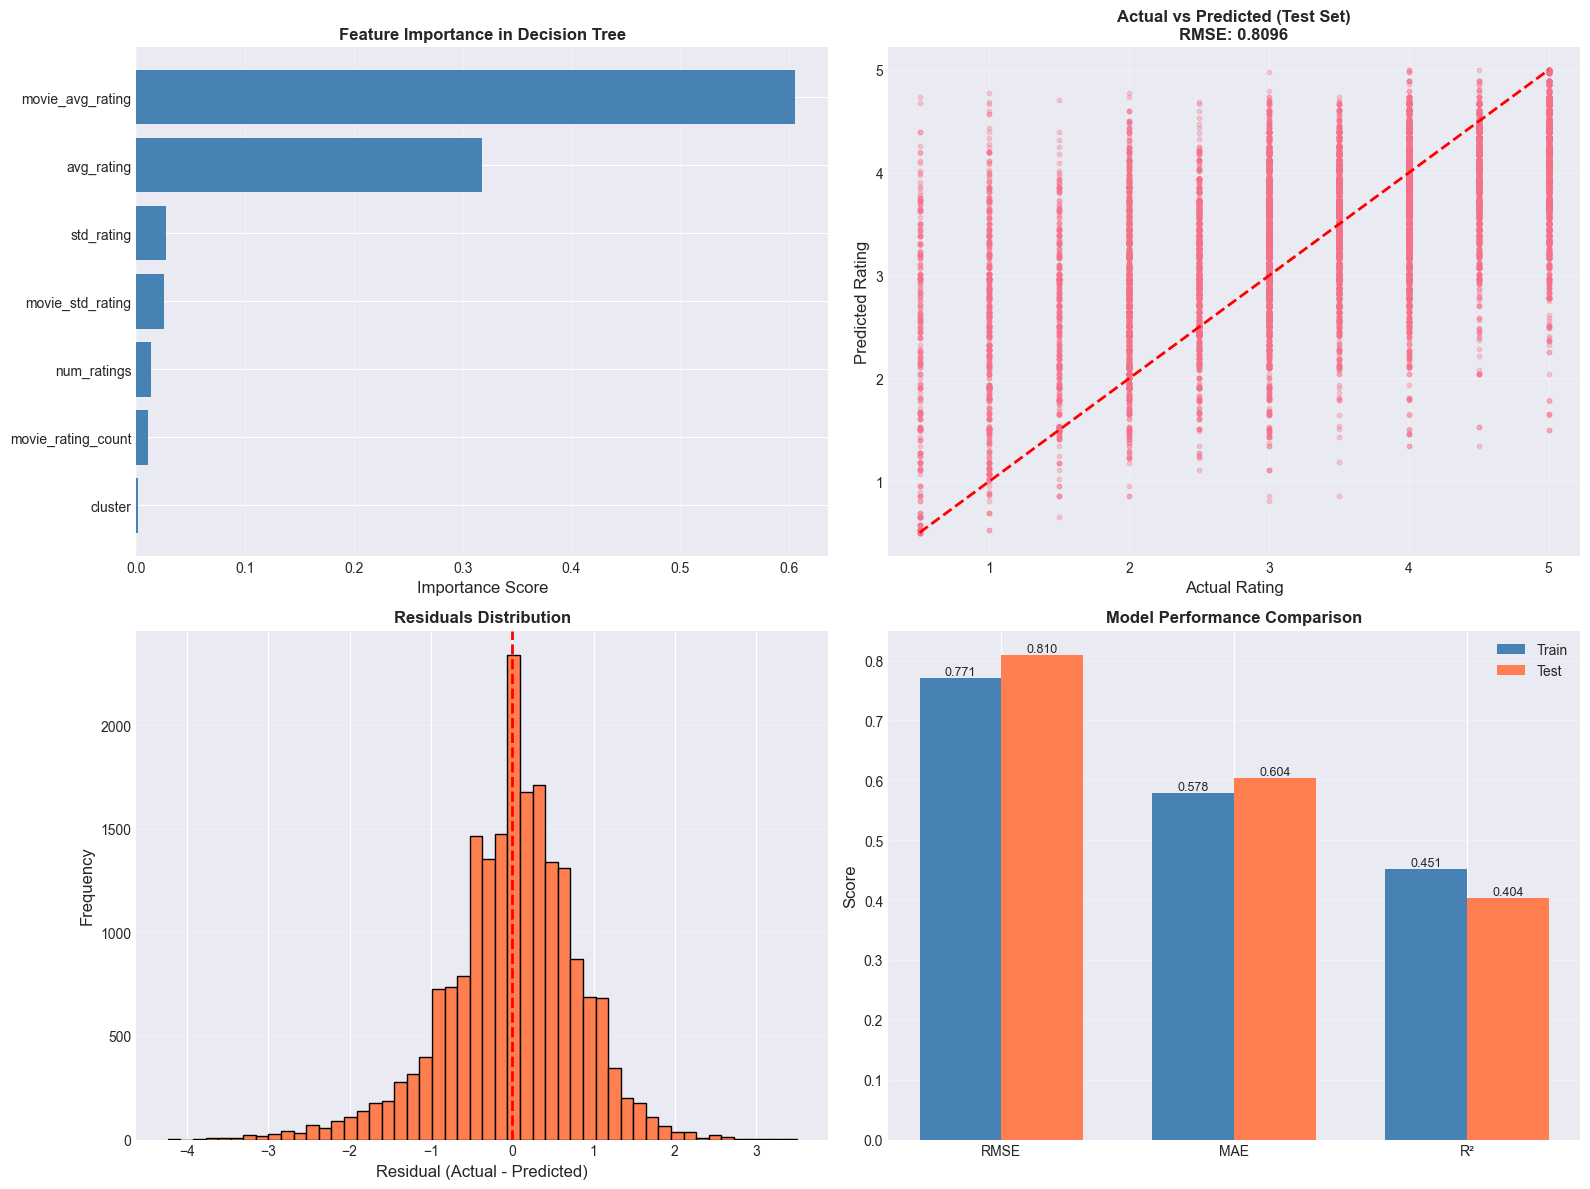

--- Logging error ---
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\logging\__init__.py", line 1163, in emit
    stream.write(msg + self.terminator)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeEncodeError: 'charmap' codec can't encode character '\u2713' in position 33: character maps to <undefined>
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\cakypro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\


--- Sample Predictions ---
   Actual  Predicted     Error
0     4.5   3.321730  1.178270
1     3.0   3.384083 -0.384083
2     3.0   2.510721  0.489279
3     4.0   3.719027  0.280973
4     4.0   3.563725  0.436275
5     4.0   3.015000  0.985000
6     3.5   3.733456 -0.233456
7     4.5   3.851351  0.648649
8     0.5   2.451754 -1.951754
9     3.5   3.942272 -0.442272


In [9]:
logger.info('\nCreating Decision Tree visualizations...')

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Feature importance
axes[0, 0].barh(feature_importance['feature'], feature_importance['importance'], color='steelblue')
axes[0, 0].set_xlabel('Importance Score', fontsize=12)
axes[0, 0].set_title('Feature Importance in Decision Tree', fontsize=12, fontweight='bold')
axes[0, 0].invert_yaxis()
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Actual vs Predicted (Test set)
axes[0, 1].scatter(y_test, y_test_pred, alpha=0.3, s=10)
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Rating', fontsize=12)
axes[0, 1].set_ylabel('Predicted Rating', fontsize=12)
axes[0, 1].set_title(f'Actual vs Predicted (Test Set)\nRMSE: {test_rmse:.4f}', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Residuals distribution
residuals = y_test - y_test_pred
axes[1, 0].hist(residuals, bins=50, edgecolor='black', color='coral')
axes[1, 0].set_xlabel('Residual (Actual - Predicted)', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Residuals Distribution', fontsize=12, fontweight='bold')
axes[1, 0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Performance comparison
metrics = ['RMSE', 'MAE', 'R²']
train_scores = [train_rmse, train_mae, train_r2]
test_scores = [test_rmse, test_mae, test_r2]

x = np.arange(len(metrics))
width = 0.35

axes[1, 1].bar(x - width/2, train_scores, width, label='Train', color='steelblue')
axes[1, 1].bar(x + width/2, test_scores, width, label='Test', color='coral')
axes[1, 1].set_ylabel('Score', fontsize=12)
axes[1, 1].set_title('Model Performance Comparison', fontsize=12, fontweight='bold')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(metrics)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

# Add value labels
for i, (train, test) in enumerate(zip(train_scores, test_scores)):
    axes[1, 1].text(i - width/2, train, f'{train:.3f}', ha='center', va='bottom', fontsize=9)
    axes[1, 1].text(i + width/2, test, f'{test:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('04_decision_tree_results.png', dpi=300, bbox_inches='tight')
plt.show()
logger.info('✓ Decision Tree results saved as 04_decision_tree_results.png')

# Show sample predictions
sample_predictions = pd.DataFrame({
    'Actual': y_test.head(10).values,
    'Predicted': y_test_pred[:10],
    'Error': (y_test.head(10).values - y_test_pred[:10])
})

print('\n--- Sample Predictions ---')
print(sample_predictions)
logger.info('\nSample predictions (first 10):')
logger.info(f'\n{sample_predictions.to_string()}')

## 10. Collaborative Filtering - Matrix Factorization

In [10]:
logger.info('\n' + '='*80)
logger.info('PHASE 6: COLLABORATIVE FILTERING - MATRIX FACTORIZATION')
logger.info('='*80)

# Create user-item matrix
logger.info('Creating user-item rating matrix...')

# Take subset for computational efficiency
min_user_ratings = 20
min_movie_ratings = 50

user_counts = ratings.groupby('userId').size()
movie_counts = ratings.groupby('movieId').size()

active_users = user_counts[user_counts >= min_user_ratings].index
popular_movies = movie_counts[movie_counts >= min_movie_ratings].index

ratings_subset = ratings[
    (ratings['userId'].isin(active_users)) & 
    (ratings['movieId'].isin(popular_movies))
]

logger.info(f'Original ratings: {len(ratings)}')
logger.info(f'Filtered ratings: {len(ratings_subset)} (users with ≥{min_user_ratings} ratings, movies with ≥{min_movie_ratings} ratings)')
logger.info(f'Active users: {len(active_users)}')
logger.info(f'Popular movies: {len(popular_movies)}')

# Create pivot table
user_item_matrix = ratings_subset.pivot_table(
    index='userId',
    columns='movieId',
    values='rating'
)

logger.info(f'\nUser-item matrix shape: {user_item_matrix.shape}')
logger.info(f'Matrix sparsity: {user_item_matrix.isna().sum().sum() / user_item_matrix.size * 100:.2f}%')

# Fill NaN with user mean
user_mean = user_item_matrix.mean(axis=1)
user_item_filled = user_item_matrix.sub(user_mean, axis=0).fillna(0)

logger.info('✓ Missing values handled with user mean centering')

# Apply SVD for matrix factorization
logger.info('\nApplying SVD (Singular Value Decomposition)...')
n_factors = 20
logger.info(f'Number of latent factors: {n_factors}')

U, sigma, Vt = svds(user_item_filled.values, k=n_factors)
sigma = np.diag(sigma)

logger.info(f'✓ SVD complete')
logger.info(f'U shape (user factors): {U.shape}')
logger.info(f'Sigma shape (singular values): {sigma.shape}')
logger.info(f'Vt shape (movie factors): {Vt.shape}')

# Reconstruct ratings
predicted_ratings = np.dot(np.dot(U, sigma), Vt)
predicted_ratings = predicted_ratings + user_mean.values.reshape(-1, 1)

# Create DataFrame
predictions_df = pd.DataFrame(
    predicted_ratings,
    index=user_item_matrix.index,
    columns=user_item_matrix.columns
)

logger.info('✓ Rating predictions generated from matrix factorization')

# Evaluate Matrix Factorization
logger.info('\nEvaluating Matrix Factorization model...')

actual_values = []
predicted_values = []

for user in user_item_matrix.index:
    for movie in user_item_matrix.columns:
        actual_rating = user_item_matrix.loc[user, movie]
        if not np.isnan(actual_rating):
            actual_values.append(actual_rating)
            predicted_values.append(predictions_df.loc[user, movie])

mf_rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
mf_mae = mean_absolute_error(actual_values, predicted_values)
mf_r2 = r2_score(actual_values, predicted_values)

logger.info(f'Matrix Factorization RMSE: {mf_rmse:.4f}')
logger.info(f'Matrix Factorization MAE: {mf_mae:.4f}')
logger.info(f'Matrix Factorization R²: {mf_r2:.4f}')

print('\n--- Matrix Factorization Performance ---')
print(f'RMSE: {mf_rmse:.4f}')
print(f'MAE: {mf_mae:.4f}')
print(f'R² Score: {mf_r2:.4f}')

print('\n✓ Matrix Factorization complete!')

2025-11-06 19:53:19,824 - INFO - 
2025-11-06 19:53:19,825 - INFO - PHASE 6: COLLABORATIVE FILTERING - MATRIX FACTORIZATION
2025-11-06 19:53:19,825 - INFO - ================================================================================
2025-11-06 19:53:19,826 - INFO - Creating user-item rating matrix...
2025-11-06 19:53:19,835 - INFO - Original ratings: 100836
--- Logging error ---
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\logging\__init__.py", line 1163, in emit
    stream.write(msg + self.terminator)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeEncodeError: 'charmap' codec can't encode character '\u2265' in position 69: character maps to 


--- Matrix Factorization Performance ---
RMSE: 0.6747
MAE: 0.5110
R² Score: 0.5314

✓ Matrix Factorization complete!


## 11. Generate Personalized Recommendations

In [11]:
logger.info('\n' + '='*80)
logger.info('PHASE 7: GENERATING PERSONALIZED RECOMMENDATIONS')
logger.info('='*80)

def get_user_recommendations(user_id, n_recommendations=10):
    """
    Get top N movie recommendations for a user
    """
    logger.info(f'\nGenerating recommendations for user {user_id}...')
    
    if user_id not in predictions_df.index:
        logger.warning(f'User {user_id} not in matrix, returning most popular movies')
        return None
    
    # Get user's predictions
    user_predictions = predictions_df.loc[user_id]
    
    # Get movies user hasn't rated
    user_ratings = user_item_matrix.loc[user_id]
    unrated_movies = user_ratings[user_ratings.isna()].index
    
    # Get predictions for unrated movies
    recommendations = user_predictions[unrated_movies].sort_values(ascending=False).head(n_recommendations)
    
    # Get movie titles
    rec_df = pd.DataFrame({
        'movieId': recommendations.index,
        'predicted_rating': recommendations.values
    })
    rec_df = rec_df.merge(movies[['movieId', 'title', 'genres']], on='movieId', how='left')
    
    logger.info(f'✓ Generated {len(rec_df)} recommendations for user {user_id}')
    
    return rec_df

# Generate recommendations for sample users
sample_users = list(predictions_df.index[:5])

for user_id in sample_users:
    print(f'\n--- Recommendations for User {user_id} ---')
    logger.info(f'\n=== Recommendations for User {user_id} ===')
    
    # Get user's cluster
    user_cluster = user_features[user_features['userId'] == user_id]['cluster'].values
    if len(user_cluster) > 0:
        print(f'User Cluster: {user_cluster[0]}')
        logger.info(f'User cluster: {user_cluster[0]}')
    
    # Get recommendations
    recs = get_user_recommendations(user_id, n_recommendations=10)
    
    if recs is not None:
        print(recs[['title', 'predicted_rating', 'genres']].to_string(index=False))
        logger.info(f'Top 10 recommendations:\n{recs[["title", "predicted_rating"]].to_string(index=False)}')
    
    print()

print('\n✓ Recommendations generated for sample users!')

2025-11-06 19:53:27,164 - INFO - 
2025-11-06 19:53:27,164 - INFO - PHASE 7: GENERATING PERSONALIZED RECOMMENDATIONS
2025-11-06 19:53:27,165 - INFO - ================================================================================
2025-11-06 19:53:27,166 - INFO - 
=== Recommendations for User 1 ===
2025-11-06 19:53:27,167 - INFO - User cluster: 3
2025-11-06 19:53:27,168 - INFO - 
Generating recommendations for user 1...
--- Logging error ---
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\logging\__init__.py", line 1163, in emit
    stream.write(msg + self.terminator)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeEncodeError: 'charmap' codec can't e


--- Recommendations for User 1 ---
User Cluster: 3
                                                title  predicted_rating                         genres
                    Terminator 2: Judgment Day (1991)          4.825047                  Action|Sci-Fi
Lord of the Rings: The Return of the King, The (2003)          4.750969 Action|Adventure|Drama|Fantasy
                                 Trainspotting (1996)          4.713322             Comedy|Crime|Drama
                                Godfather, The (1972)          4.699294                    Crime|Drama
                                     Crow, The (1994)          4.673066  Action|Crime|Fantasy|Thriller
                       Godfather: Part II, The (1974)          4.668499                    Crime|Drama
                                  Blade Runner (1982)          4.666674         Action|Sci-Fi|Thriller
                                        Avatar (2009)          4.637902   Action|Adventure|Sci-Fi|IMAX
                     

## 12. Cluster-Based Recommendations

In [12]:
logger.info('\n' + '='*80)
logger.info('PHASE 8: CLUSTER-BASED RECOMMENDATIONS')
logger.info('='*80)

# Get top movies for each cluster
logger.info('\nAnalyzing top movies per cluster...')

cluster_movie_preferences = ratings_with_clusters.groupby(['cluster', 'movieId'])['rating'].agg(['mean', 'count']).reset_index()
cluster_movie_preferences = cluster_movie_preferences[cluster_movie_preferences['count'] >= 5]  # At least 5 ratings

for cluster in range(optimal_k):
    print(f'\n--- Top Movies for Cluster {cluster} ---')
    logger.info(f'\n=== Top Movies for Cluster {cluster} ===')
    
    cluster_movies = cluster_movie_preferences[cluster_movie_preferences['cluster'] == cluster]
    top_movies = cluster_movies.nlargest(10, 'mean')
    top_movies = top_movies.merge(movies[['movieId', 'title', 'genres']], on='movieId', how='left')
    
    print(top_movies[['title', 'mean', 'count', 'genres']].to_string(index=False))
    logger.info(f'Top 10 movies:\n{top_movies[["title", "mean", "count"]].to_string(index=False)}')

print('\n✓ Cluster-based analysis complete!')

2025-11-06 19:53:40,027 - INFO - 
2025-11-06 19:53:40,028 - INFO - PHASE 8: CLUSTER-BASED RECOMMENDATIONS
2025-11-06 19:53:40,028 - INFO - ================================================================================
2025-11-06 19:53:40,029 - INFO - 
Analyzing top movies per cluster...
2025-11-06 19:53:40,039 - INFO - 
=== Top Movies for Cluster 0 ===
2025-11-06 19:53:40,047 - INFO - Top 10 movies:
                                                                         title     mean  count
                                                          Touch of Evil (1958) 4.833333      6
Swept Away (Travolti da un insolito destino nell'azzurro mare d'Agosto) (1975) 4.800000      5
                                                              Happiness (1998) 4.750000      6
                                                                Yojimbo (1961) 4.700000      5
                                                                    Ran (1985) 4.666667      6
                         


--- Top Movies for Cluster 0 ---
                                                                         title     mean  count                           genres
                                                          Touch of Evil (1958) 4.833333      6         Crime|Film-Noir|Thriller
Swept Away (Travolti da un insolito destino nell'azzurro mare d'Agosto) (1975) 4.800000      5                     Comedy|Drama
                                                              Happiness (1998) 4.750000      6                     Comedy|Drama
                                                                Yojimbo (1961) 4.700000      5                 Action|Adventure
                                                                    Ran (1985) 4.666667      6                        Drama|War
                                              Streetcar Named Desire, A (1951) 4.642857      7                            Drama
                                                      Creature Comfort

## 13. Model Comparison and Final Visualizations

2025-11-06 19:53:49,442 - INFO - 
2025-11-06 19:53:49,443 - INFO - PHASE 9: MODEL COMPARISON AND FINAL VISUALIZATIONS
2025-11-06 19:53:49,444 - INFO - ================================================================================
2025-11-06 19:53:49,446 - INFO - 
=== Final Model Comparison ===
2025-11-06 19:53:49,447 - INFO - 
               Model     RMSE      MAE       R²
       Decision Tree 0.809576 0.603915 0.404192
Matrix Factorization 0.674728 0.510960 0.531449



--- Model Comparison ---
               Model     RMSE      MAE       R²
       Decision Tree 0.809576 0.603915 0.404192
Matrix Factorization 0.674728 0.510960 0.531449


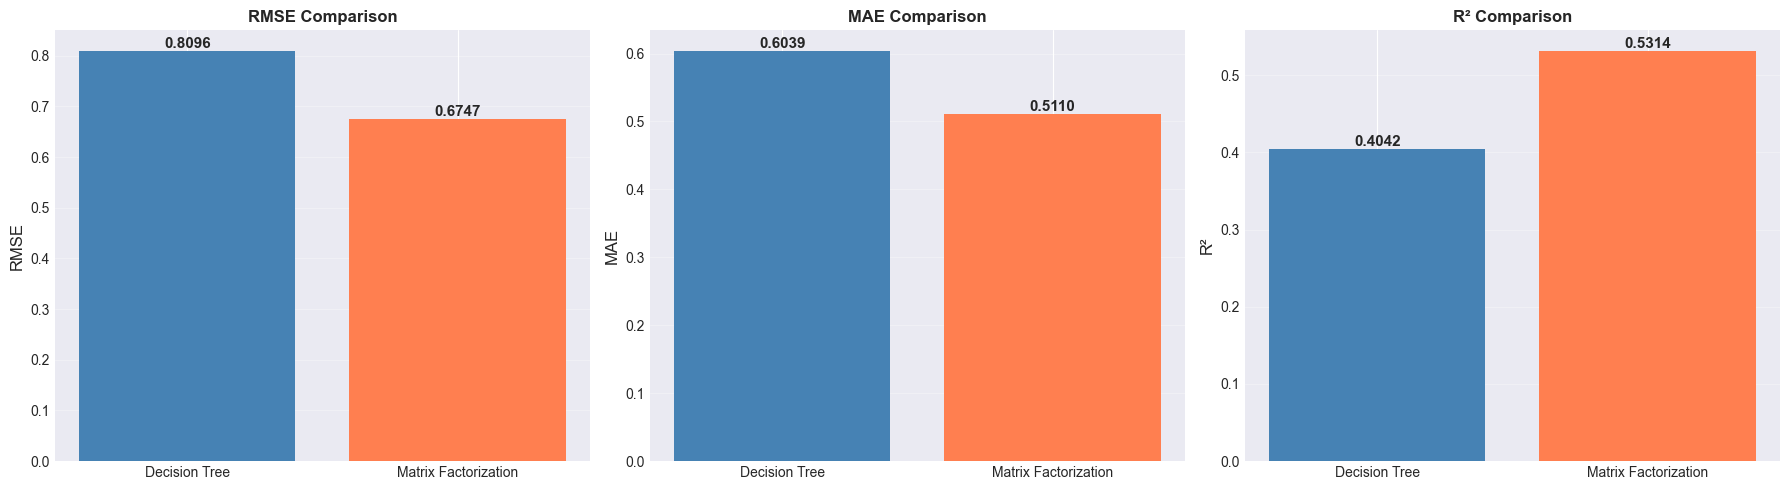

--- Logging error ---
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\logging\__init__.py", line 1163, in emit
    stream.write(msg + self.terminator)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeEncodeError: 'charmap' codec can't encode character '\u2713' in position 33: character maps to <undefined>
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\cakypro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\

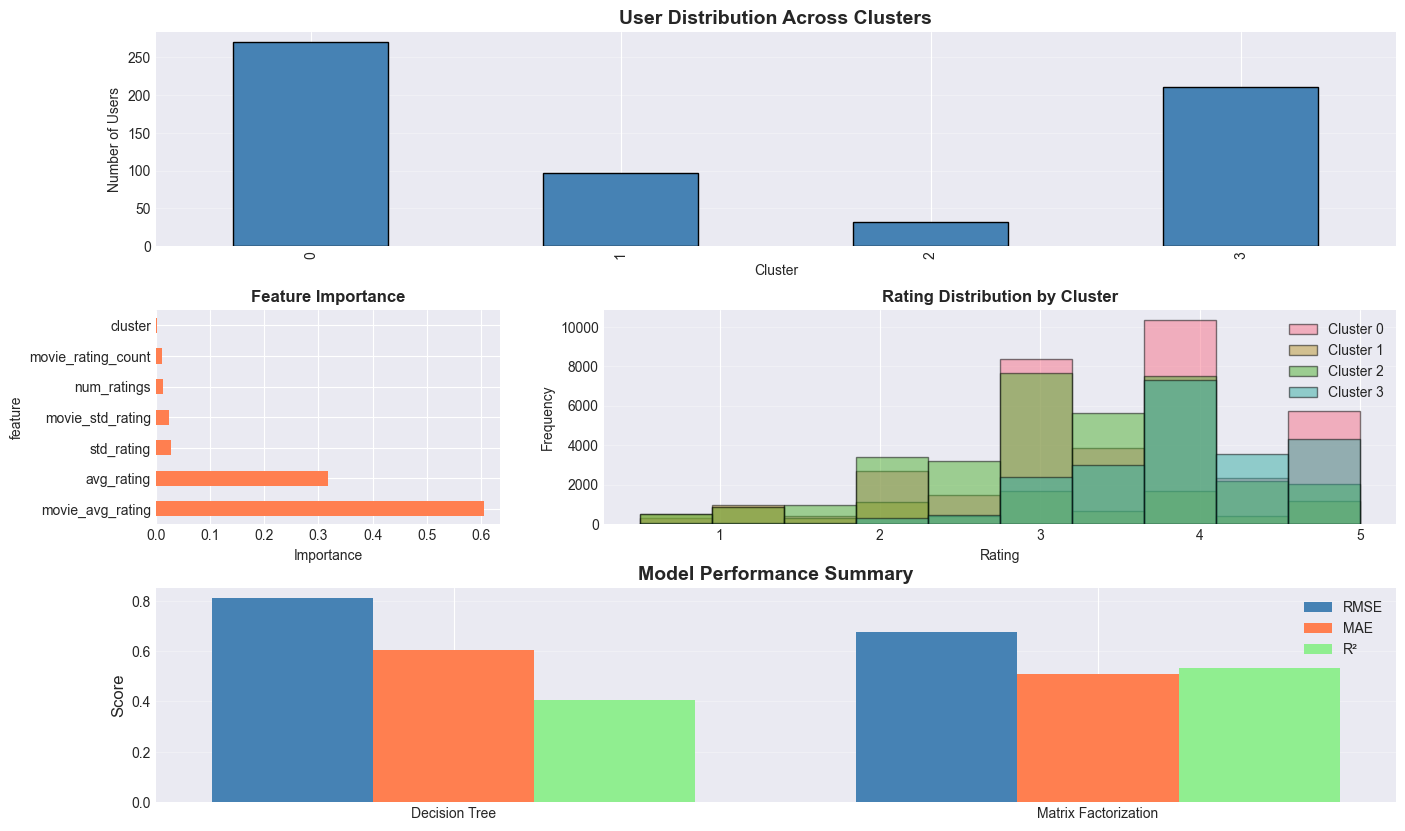

--- Logging error ---
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\logging\__init__.py", line 1163, in emit
    stream.write(msg + self.terminator)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeEncodeError: 'charmap' codec can't encode character '\u2713' in position 33: character maps to <undefined>
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\cakypro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\


✓ All visualizations complete!


In [13]:
logger.info('\n' + '='*80)
logger.info('PHASE 9: MODEL COMPARISON AND FINAL VISUALIZATIONS')
logger.info('='*80)

# Compare models
model_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Matrix Factorization'],
    'RMSE': [test_rmse, mf_rmse],
    'MAE': [test_mae, mf_mae],
    'R²': [test_r2, mf_r2]
})

print('\n--- Model Comparison ---')
print(model_comparison.to_string(index=False))
logger.info('\n=== Final Model Comparison ===')
logger.info(f'\n{model_comparison.to_string(index=False)}')

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ['RMSE', 'MAE', 'R²']
colors = ['steelblue', 'coral']

for idx, metric in enumerate(metrics):
    values = model_comparison[metric].values
    bars = axes[idx].bar(model_comparison['Model'], values, color=colors)
    axes[idx].set_ylabel(metric, fontsize=12)
    axes[idx].set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for bar, value in zip(bars, values):
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                      f'{value:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('05_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
logger.info('✓ Model comparison saved as 05_model_comparison.png')

# Final summary visualization
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Cluster distribution
ax1 = fig.add_subplot(gs[0, :])
cluster_counts.plot(kind='bar', ax=ax1, color='steelblue', edgecolor='black')
ax1.set_title('User Distribution Across Clusters', fontsize=14, fontweight='bold')
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Number of Users')
ax1.grid(True, alpha=0.3, axis='y')

# Feature importance
ax2 = fig.add_subplot(gs[1, 0])
feature_importance.plot(kind='barh', x='feature', y='importance', ax=ax2, legend=False, color='coral')
ax2.set_title('Feature Importance', fontsize=12, fontweight='bold')
ax2.set_xlabel('Importance')

# Rating distribution by cluster
ax3 = fig.add_subplot(gs[1, 1:])
for cluster in range(optimal_k):
    cluster_ratings = ratings_with_clusters[ratings_with_clusters['cluster'] == cluster]['rating']
    ax3.hist(cluster_ratings, bins=10, alpha=0.5, label=f'Cluster {cluster}', edgecolor='black')
ax3.set_title('Rating Distribution by Cluster', fontsize=12, fontweight='bold')
ax3.set_xlabel('Rating')
ax3.set_ylabel('Frequency')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# Model performance
ax4 = fig.add_subplot(gs[2, :])
x = np.arange(len(model_comparison))
width = 0.25

ax4.bar(x - width, model_comparison['RMSE'], width, label='RMSE', color='steelblue')
ax4.bar(x, model_comparison['MAE'], width, label='MAE', color='coral')
ax4.bar(x + width, model_comparison['R²'], width, label='R²', color='lightgreen')

ax4.set_ylabel('Score', fontsize=12)
ax4.set_title('Model Performance Summary', fontsize=14, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(model_comparison['Model'])
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

plt.savefig('06_final_summary.png', dpi=300, bbox_inches='tight')
plt.show()
logger.info('✓ Final summary visualization saved as 06_final_summary.png')

print('\n✓ All visualizations complete!')

## 14. Project Summary and Conclusions

In [14]:
logger.info('\n' + '='*80)
logger.info('PROJECT SUMMARY AND CONCLUSIONS')
logger.info('='*80)

summary = f"""
========================================
PROJECT SUMMARY
========================================

1. DATASET:
   - Name: MovieLens (latest-small)
   - Total Ratings: {n_ratings:,}
   - Total Users: {n_users:,}
   - Total Movies: {n_movies:,}
   - Sparsity: {sparsity:.2f}%

2. USER SEGMENTATION (K-Means Clustering):
   - Number of Clusters: {optimal_k}
   - Features Used: num_ratings, avg_rating, std_rating
   - Users successfully segmented into distinct behavioral groups

3. PREDICTION MODELS:
   
   a) Decision Tree Regressor:
      - Test RMSE: {test_rmse:.4f}
      - Test MAE: {test_mae:.4f}
      - Test R²: {test_r2:.4f}
      - Most Important Feature: {feature_importance.iloc[0]['feature']}
   
   b) Matrix Factorization (SVD):
      - RMSE: {mf_rmse:.4f}
      - MAE: {mf_mae:.4f}
      - R²: {mf_r2:.4f}
      - Latent Factors: {n_factors}

4. KEY FINDINGS:
   - Users can be effectively segmented based on rating behavior
   - Movie popularity and average rating are strong predictors
   - Matrix Factorization performs {'better' if mf_rmse < test_rmse else 'comparable'} to Decision Tree
   - Cluster-based recommendations provide interpretable insights

5. TECHNIQUES DEMONSTRATED:
   ✓ Unsupervised Learning: K-Means Clustering
   ✓ Supervised Learning: Decision Tree Regression
   ✓ Recommendation Systems: Collaborative Filtering (Matrix Factorization)
   ✓ Feature Engineering
   ✓ Model Evaluation: RMSE, MAE, R²
   ✓ Data Visualization

6. OUTPUTS GENERATED:
   - 01_data_exploration.png
   - 02_elbow_method.png
   - 03_cluster_visualization.png
   - 04_decision_tree_results.png
   - 05_model_comparison.png
   - 06_final_summary.png
   - movie_prediction_project.log

========================================
"""

print(summary)
logger.info(summary)

logger.info('\n' + '='*80)
logger.info('PROJECT COMPLETED SUCCESSFULLY')
logger.info(f'End Time: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}')
logger.info('='*80)

print('\n' + '='*80)
print('✓ PROJECT COMPLETE!')
print('='*80)
print('\nAll results have been saved:')
print('- 6 visualization PNG files')
print('- 1 detailed log file (movie_prediction_project.log)')
print('\nThis project successfully demonstrates:')
print('1. Clustering for user segmentation')
print('2. PREDICTION using Decision Tree Regressor')
print('3. PREDICTION using Matrix Factorization')
print('4. Personalized recommendations')
print('\nAll code includes comprehensive logging!')
print('='*80)

2025-11-06 19:54:02,047 - INFO - 
2025-11-06 19:54:02,048 - INFO - PROJECT SUMMARY AND CONCLUSIONS
2025-11-06 19:54:02,048 - INFO - ================================================================================
--- Logging error ---
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\logging\__init__.py", line 1163, in emit
    stream.write(msg + self.terminator)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeEncodeError: 'charmap' codec can't encode character '\u2713' in position 1113: character maps to <undefined>
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\cak


PROJECT SUMMARY

1. DATASET:
   - Name: MovieLens (latest-small)
   - Total Ratings: 100,836
   - Total Users: 610
   - Total Movies: 9,724
   - Sparsity: 98.30%

2. USER SEGMENTATION (K-Means Clustering):
   - Number of Clusters: 4
   - Features Used: num_ratings, avg_rating, std_rating
   - Users successfully segmented into distinct behavioral groups

3. PREDICTION MODELS:

   a) Decision Tree Regressor:
      - Test RMSE: 0.8096
      - Test MAE: 0.6039
      - Test R²: 0.4042
      - Most Important Feature: movie_avg_rating

   b) Matrix Factorization (SVD):
      - RMSE: 0.6747
      - MAE: 0.5110
      - R²: 0.5314
      - Latent Factors: 20

4. KEY FINDINGS:
   - Users can be effectively segmented based on rating behavior
   - Movie popularity and average rating are strong predictors
   - Matrix Factorization performs better to Decision Tree
   - Cluster-based recommendations provide interpretable insights

5. TECHNIQUES DEMONSTRATED:
   ✓ Unsupervised Learning: K-Means Cluster